In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
dfx = pd.read_csv('G:/LEARNING/MACHINE LEARNING/machine-learning-online-2018-master/machine-learning-online-2018-master/Datasets/xdata.csv')
dfy = pd.read_csv('G:/LEARNING/MACHINE LEARNING/machine-learning-online-2018-master/machine-learning-online-2018-master/Datasets/ydata.csv')


In [12]:
X = dfx.values # converting data into numpy array
Y = dfy.values # converting data into numpy array

print(X.shape,Y.shape)

(399, 3) (399, 2)


In [13]:
X = X[:,1:]
Y = Y[:,1:]

print(X.shape,Y.shape)

(399, 2) (399, 1)


In [16]:
Y=Y.reshape((-1,))
print(X.shape,Y.shape)

(399, 2) (399,)


In [17]:
print(Y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

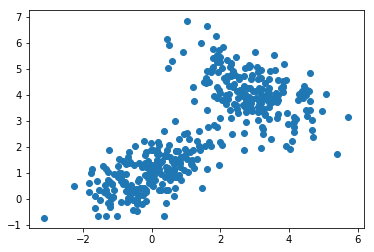

In [21]:
plt.scatter(X[:,0],X[:,1])
plt.show()

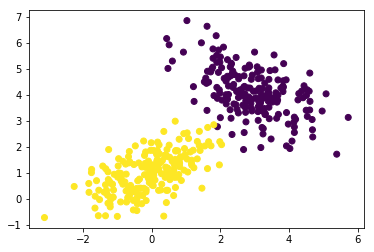

In [23]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

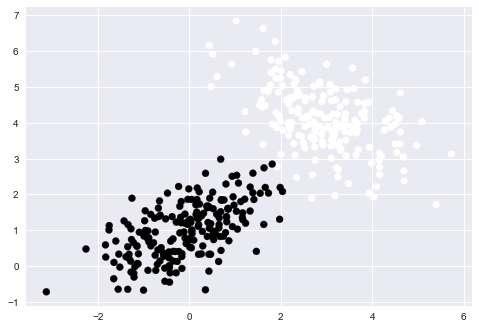

In [24]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

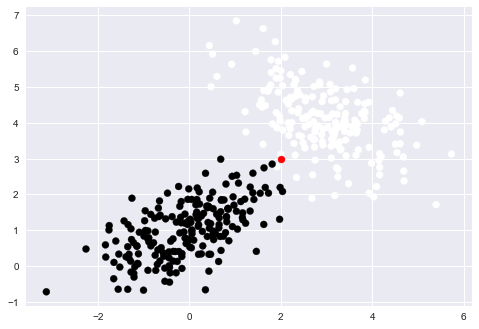

In [29]:
# let query a point as this algorithm requires no training, so directly check the class which class it belongs to
query_x = np.array([2,3])
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(query_x[0],query_x[1],color='red')
plt.show()

In [31]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [35]:
def knn_function(x,y,query_point,k=5):
    
    vals=[]
    m = x.shape[0]
    for i in range(m):
        d = distance(query_point,x[i])
        vals.append((d,y[i]))
        
    vals=sorted(vals)
    
    # find first k points
    
    vals=vals[:k] # slicing
    vals=np.array(vals)
    
    print(vals)
    return vals
    

In [34]:
vals = knn_function(X,Y,query_x)

[[0.11937695 0.        ]
 [0.24392799 1.        ]
 [0.24435617 0.        ]
 [0.32750158 0.        ]
 [0.44941874 1.        ]]


In [41]:
# majority in k nearest neighbours are class 0,
#now update the function to find the major voting and findng the clas to which this point belongs.

def knn_function(x,y,query_point,k=5):
    
    vals=[]
    m = x.shape[0]
    for i in range(m):
        d = distance(query_point,x[i])
        vals.append((d,y[i]))
        
    vals=sorted(vals)
    
    # find first k points
    
    vals=vals[:k] # slicing
    vals=np.array(vals)
    
    #print(vals)
    new_vals = np.unique(vals[:,1],return_counts=True)
    print(new_vals)
    
    max_frequency_index = new_vals[1].argmax()
    prediction = new_vals[0][max_frequency_index]
    
    return prediction
    
    
    return vals
    

In [42]:
x = knn_function(X,Y,query_x)
print(x)

(array([0., 1.]), array([3, 2]))
0.0


In [43]:
print(knn_function(X,Y,[4,5]))

(array([0.]), array([5]))
0.0


In [44]:
print(knn_function(X,Y,[0,0]))

(array([1.]), array([5]))
1.0
